<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Visão Computacional e Processamento de Imagens

Prof. Rilder de Sousa Pires<br>
Aluno: José Freitas Alves Neto<br>
Matricula:2519203<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

# Baixando imagem

In [1]:
!gdown 1GMLGAwi09Hujbm49ySqFRoKcroTKg0kj

Downloading...
From: https://drive.google.com/uc?id=1GMLGAwi09Hujbm49ySqFRoKcroTKg0kj
To: /content/baixo_contraste.png
100% 232k/232k [00:00<00:00, 20.7MB/s]


# Questão 01
- Implemente histograma dos tons de cinza da imagem abaixo:


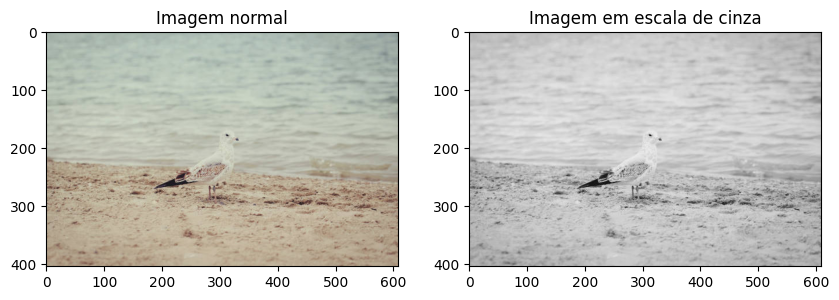

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
# Transformando imagem em escala de cinza.
imagem = cv2.imread('/content/baixo_contraste.png')
# Transformando para RGB
imagem_rgb = cv2.cvtColor(imagem,cv2.COLOR_BGR2RGB)
# Transformando para Gray
imagem_gray= cv2.cvtColor(imagem_rgb,cv2.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Imagem normal')
ax1.imshow(imagem_rgb)

ax2.set_title('Imagem em escala de cinza')
ax2.imshow(imagem_gray, cmap='gray')

plt.show()

- Plotando histograma das cores em escala de cinza.

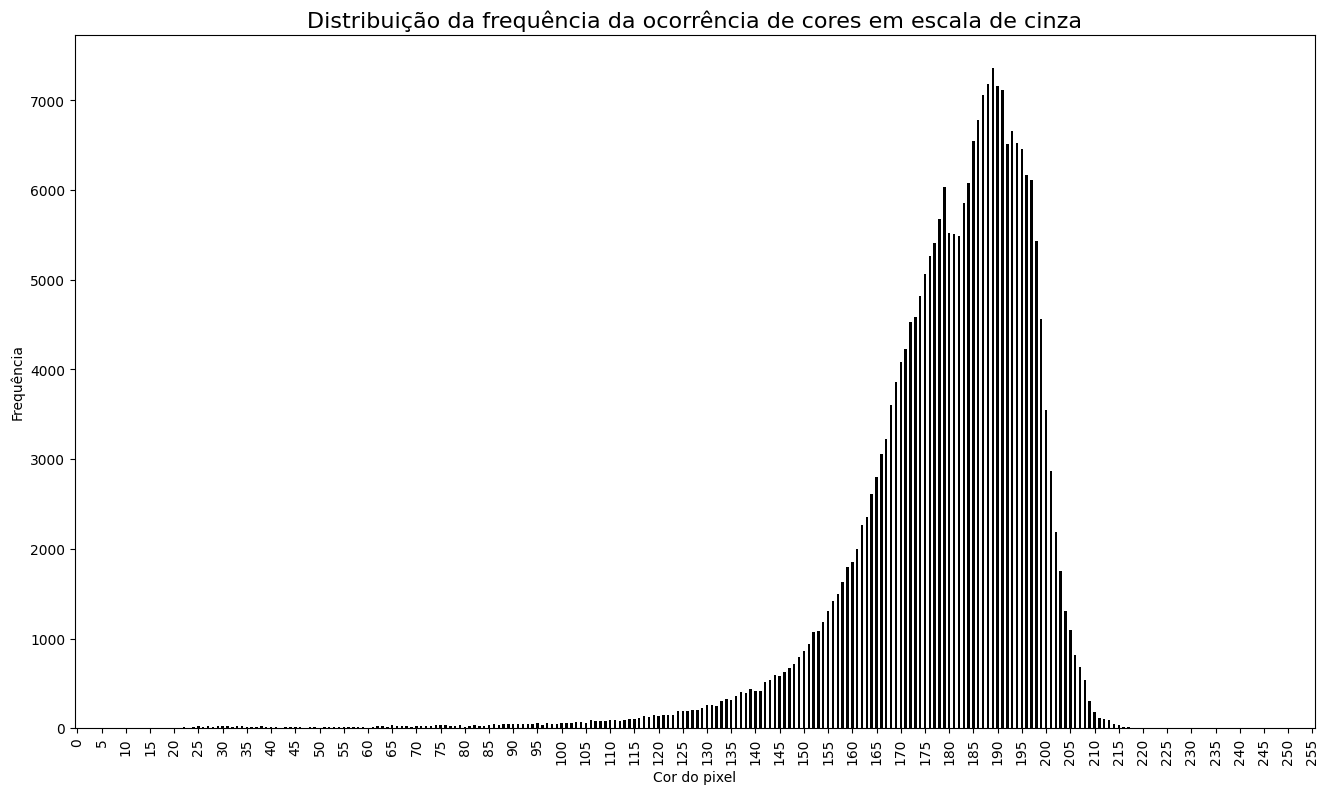

In [3]:
# Verificando a frequência de cada dado
array_histograma = np.array([0 for x in range(256)])
for linha in imagem_gray:
  for pixel in linha:
    array_histograma[pixel] = array_histograma[pixel] + 1

data_hist = pd.Series(array_histograma)

# Plotando histograma
plt.figure(figsize = (16,9))
data_hist.plot(kind = "bar",color = 'black')
plt.xticks([x for x in range(0,256,5)])
plt.title("Distribuição da frequência da ocorrência de cores em escala de cinza", size = 16)
plt.ylabel('Frequência')
plt.xlabel('Cor do pixel')
plt.show()

# Questão 02
- Implemente a transformação linear mostrada na Eq. 1. dos slides (Realce -
Transformações de contraste)
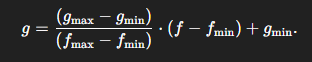

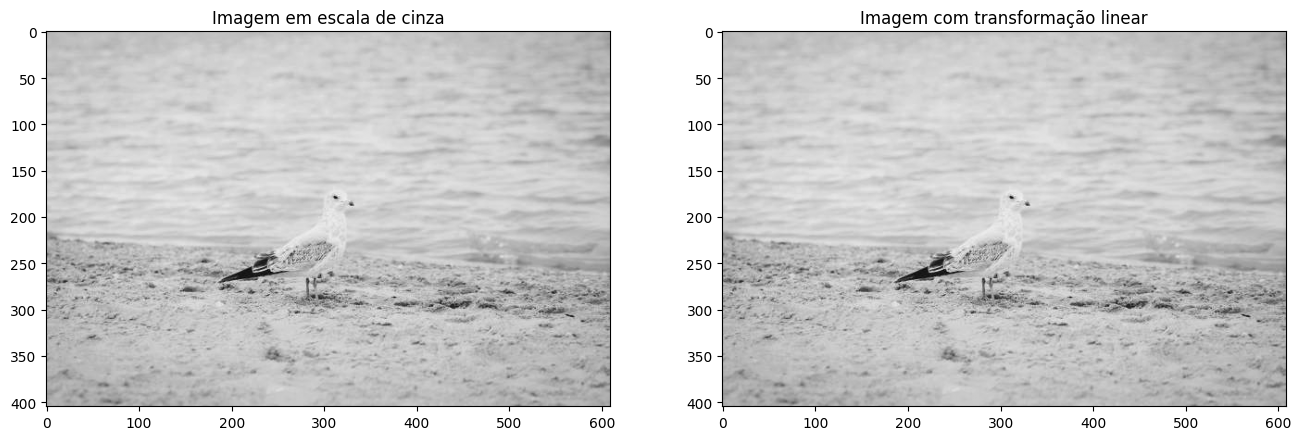

In [4]:
# Gerando os valores de F
f_min = np.min(imagem_gray)
f_max = np.max(imagem_gray)

# Gerando os valores de G
g_min = 0
g_max = 255

# Criando a função e aplicando a função
nova_imagem = ((g_max-g_min)/(f_max-f_min)*(imagem_gray-f_min)) + g_min


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.set_title('Imagem em escala de cinza')
ax1.imshow(imagem_gray, cmap='gray')

ax2.set_title('Imagem com transformação linear')
ax2.imshow(nova_imagem, cmap='gray')

plt.show()

array([[164, 163, 164, ..., 156, 155, 154],
       [164, 164, 165, ..., 156, 155, 154],
       [165, 165, 166, ..., 154, 153, 152],
       ...,
       [146, 153, 156, ..., 158, 154, 151],
       [148, 155, 157, ..., 161, 157, 152],
       [155, 160, 161, ..., 160, 155, 149]], dtype=uint8)
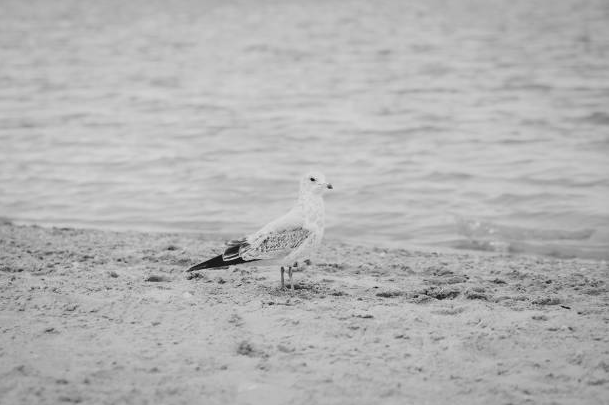

In [5]:
imagem_gray

In [6]:
nova_imagem

array([[177.1460177 , 176.01769912, 177.1460177 , ..., 168.11946903,
        166.99115044, 165.86283186],
       [177.1460177 , 177.1460177 , 178.27433628, ..., 168.11946903,
        166.99115044, 165.86283186],
       [178.27433628, 178.27433628, 179.40265487, ..., 165.86283186,
        164.73451327, 163.60619469],
       ...,
       [156.83628319, 164.73451327, 168.11946903, ..., 170.37610619,
        165.86283186, 162.47787611],
       [159.09292035, 166.99115044, 169.24778761, ..., 173.76106195,
        169.24778761, 163.60619469],
       [166.99115044, 172.63274336, 173.76106195, ..., 172.63274336,
        166.99115044, 160.22123894]])

- Aplicando na imagem colorida

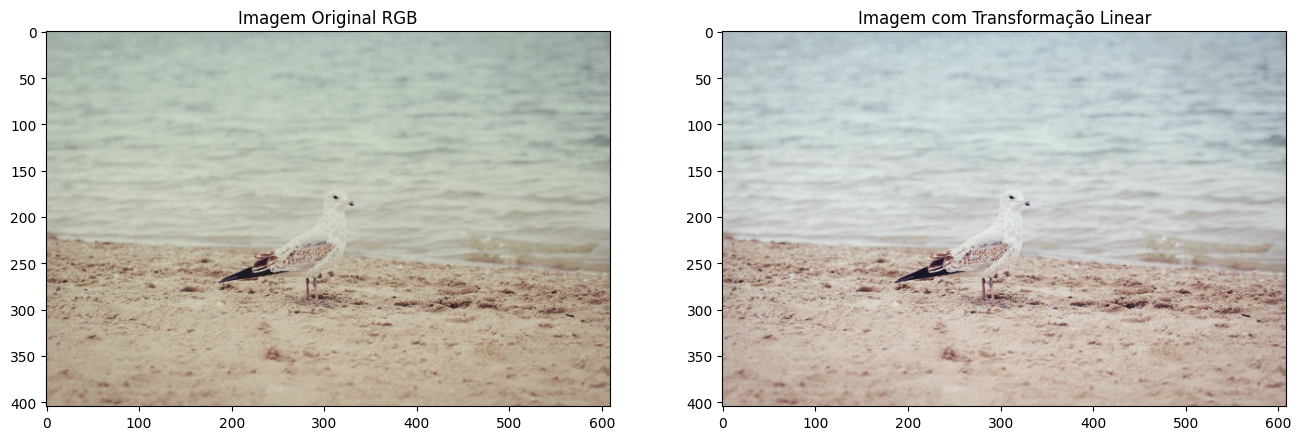

In [7]:
# Crie uma cópia para armazenar a imagem transformada
nova_imagem_rgb = np.zeros_like(imagem_rgb)

# Calculando G
g_min = 0
g_max = 255

# Calculando a transformação linear
for canal in range(3):
    f_min = np.min(imagem_rgb[:, :, canal])
    f_max = np.max(imagem_rgb[:, :, canal])
    if f_max - f_min > 0:
        nova_imagem_rgb[:, :, canal] = ((g_max-g_min)/(f_max-f_min)*(imagem_rgb[:,:,canal]-f_min)) + g_min
    else:
        nova_imagem_rgb[:, :, canal] = imagem_rgb[:, :, canal]

nova_imagem_rgb = nova_imagem_rgb.astype(np.uint8)

# Exibindo a imagem original e a transformada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.set_title('Imagem Original RGB')
ax1.imshow(imagem_rgb.astype(np.uint8))
ax2.set_title('Imagem com Transformação Linear')
ax2.imshow(nova_imagem_rgb)
plt.show()


# Questão 03
- Implemente as transformações de contraste não-lineares:

## Logaritmo

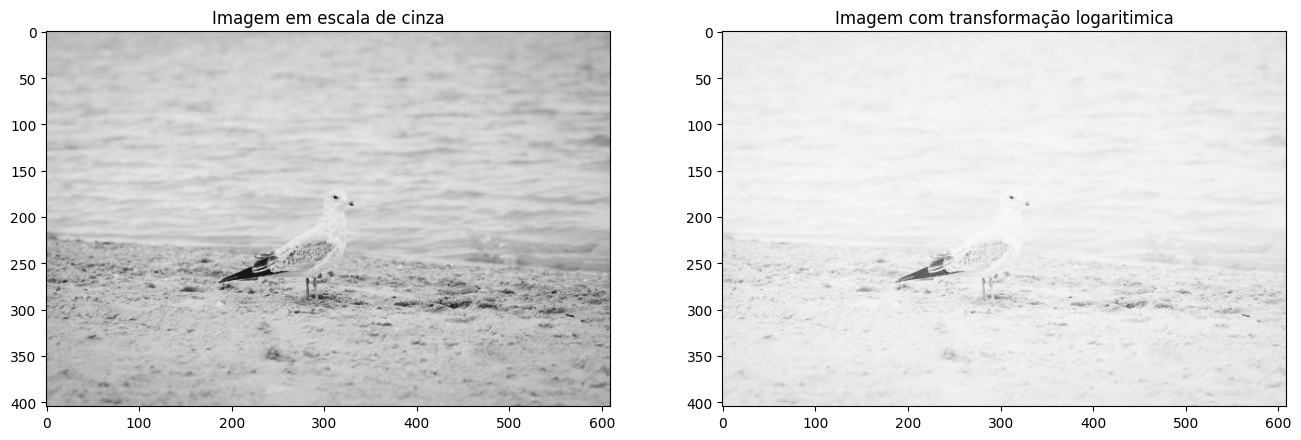

In [8]:
# Gerando os valores de F
f_min = np.min(imagem_gray)
f_max = np.max(imagem_gray)

# Gerando os valores de C
r_max = np.max(imagem_gray)
c = 255 / np.log(1 + r_max)

# Criando a função e aplicando a função
nova_imagem = c * np.log(1 + imagem_gray)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.set_title('Imagem em escala de cinza')
ax1.imshow(imagem_gray, cmap='gray')

ax2.set_title('Imagem com transformação logaritimica')
ax2.imshow(nova_imagem, cmap='gray')

plt.show()

- Aplicando na imagem colorida

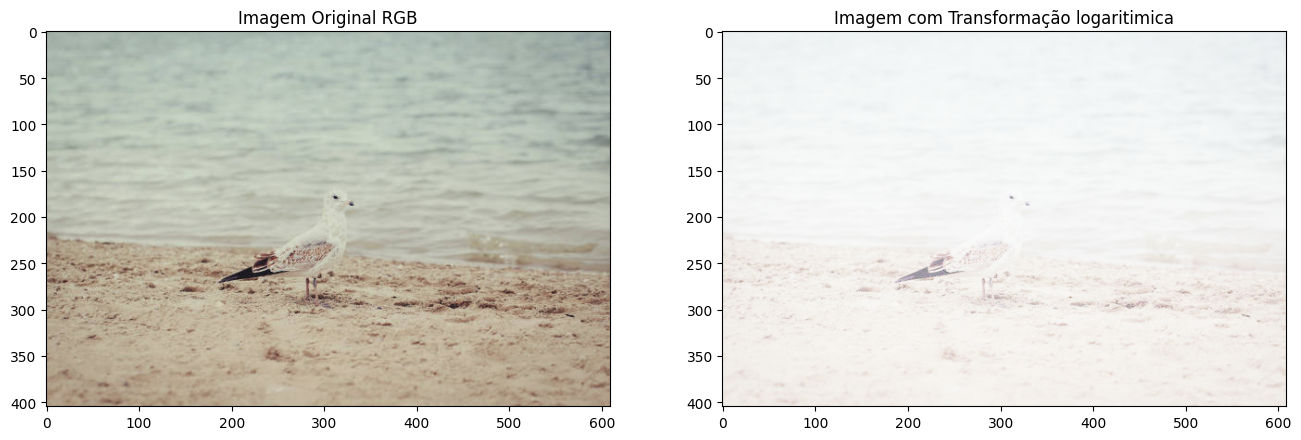

In [9]:
# Crie uma cópia para armazenar a imagem transformada
nova_imagem_rgb = np.zeros_like(imagem_rgb)

# Calculando a transformação linear
for canal in range(3):
    f_min = np.min(imagem_rgb[:, :, canal])
    f_max = np.max(imagem_rgb[:, :, canal])
    r_max = np.max(imagem_rgb[:,:,canal])
    c = 255 / np.log(1 + r_max)
    if f_max - f_min > 0:
        nova_imagem_rgb[:, :, canal] = c * np.log(1 + imagem_rgb[:,:,canal])
    else:
        nova_imagem_rgb[:, :, canal] = imagem_rgb[:, :, canal]

nova_imagem_rgb = nova_imagem_rgb.astype(np.uint8)

# Exibindo a imagem original e a transformada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.set_title('Imagem Original RGB')
ax1.imshow(imagem_rgb.astype(np.uint8))
ax2.set_title('Imagem com Transformação logaritimica')
ax2.imshow(nova_imagem_rgb)
plt.show()


## Raiz quadrada

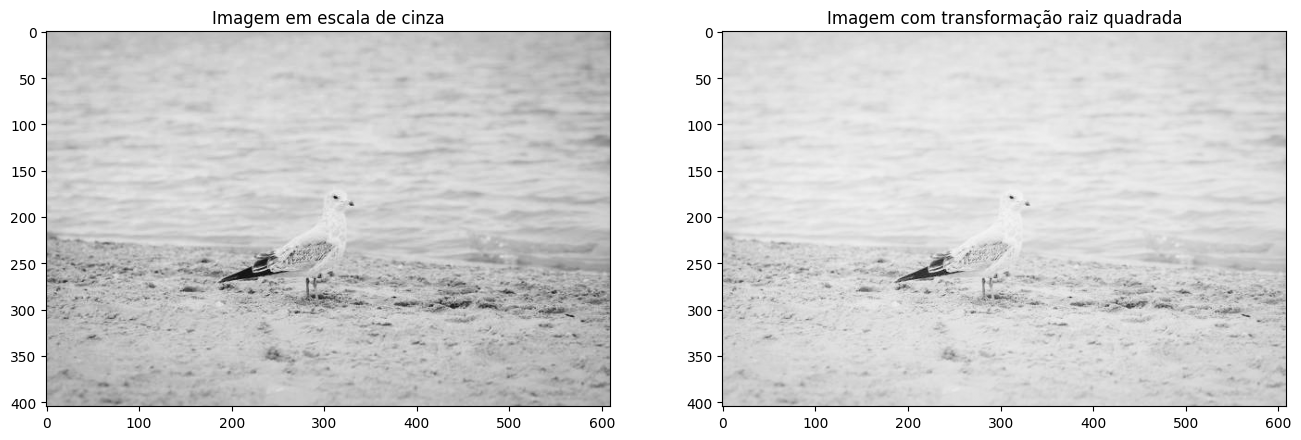

In [10]:
# Gerando os valores de F
f_min = np.min(imagem_gray)
f_max = np.max(imagem_gray)

# Gerando os valores de C
r_max = np.max(imagem_gray)
c = 255 / np.sqrt(r_max)

# Criando a função e aplicando a função
nova_imagem = c * np.sqrt(imagem_gray)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.set_title('Imagem em escala de cinza')
ax1.imshow(imagem_gray, cmap='gray')

ax2.set_title('Imagem com transformação raiz quadrada')
ax2.imshow(nova_imagem, cmap='gray')

plt.show()

- Aplicando para a imagem colorida

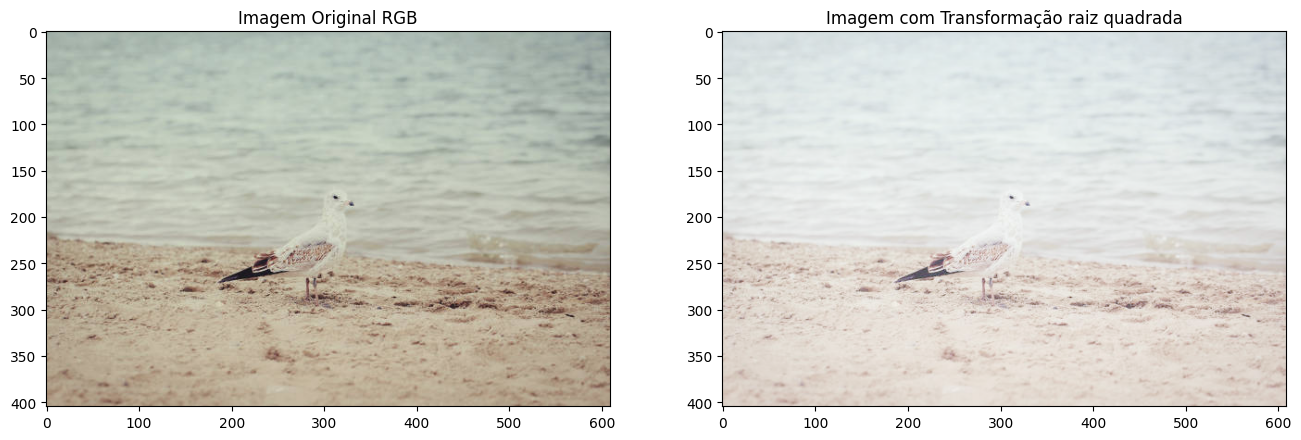

In [11]:
# Crie uma cópia para armazenar a imagem transformada
nova_imagem_rgb = np.zeros_like(imagem_rgb)

# Calculando a transformação linear
for canal in range(3):
    f_min = np.min(imagem_rgb[:, :, canal])
    f_max = np.max(imagem_rgb[:, :, canal])

    r_max = np.max(imagem_rgb[:,:,canal])
    c = 255 / np.sqrt(1 + r_max)
    if f_max - f_min > 0:
        nova_imagem_rgb[:, :, canal] = c * np.sqrt(1 + imagem_rgb[:,:,canal])
    else:
        nova_imagem_rgb[:, :, canal] = imagem_rgb[:, :, canal]

nova_imagem_rgb = nova_imagem_rgb.astype(np.uint8)

# Exibindo a imagem original e a transformada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.set_title('Imagem Original RGB')
ax1.imshow(imagem_rgb.astype(np.uint8))
ax2.set_title('Imagem com Transformação raiz quadrada')
ax2.imshow(nova_imagem_rgb)
plt.show()


## Exponencial

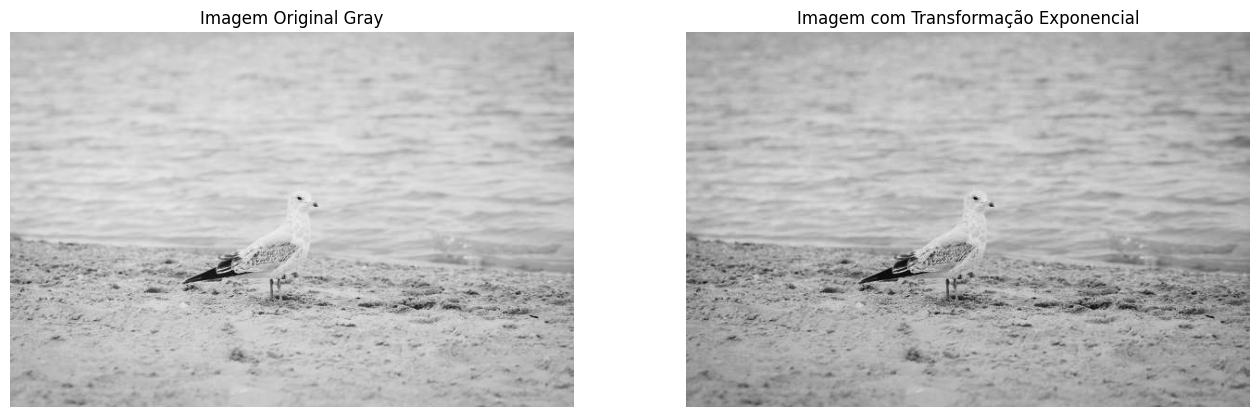

In [12]:
# Normalizando a imagem para o intervalo [0, 1]
imagem_float = imagem_gray / 255.0

# Cria uma cópia para armazenar a imagem transformada (em float para preservar a precisão)
nova_imagem_gray = np.zeros_like(imagem_gray, dtype=np.float32)

# Calcula a constante c:
c = 255 / (np.exp(1) - 1)

# Verifica os valores mínimo e máximo para ver se a imagem possui variação
f_min = np.min(imagem_gray)
f_max = np.max(imagem_gray)

if f_max - f_min > 0:
    # Aplica a transformação exponencial: s = c * exp(r - 1)
    nova_imagem_gray = c * np.exp(imagem_float - 1)
else:
    # Se a imagem for constante, mantém os valores originais
    nova_imagem_gray = imagem_gray.copy()

# Garante que os valores estejam no intervalo [0, 255] e converte para uint8
nova_imagem_gray = np.clip(nova_imagem_gray, 0, 255).astype(np.uint8)

# Exibindo a imagem original e a transformada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.set_title('Imagem Original Gray')
ax1.imshow(imagem_gray, cmap='gray')
ax1.axis('off')
ax2.set_title('Imagem com Transformação Exponencial')
ax2.imshow(nova_imagem_gray, cmap='gray')
ax2.axis('off')
plt.show()

- Aplicando na imagem colorida

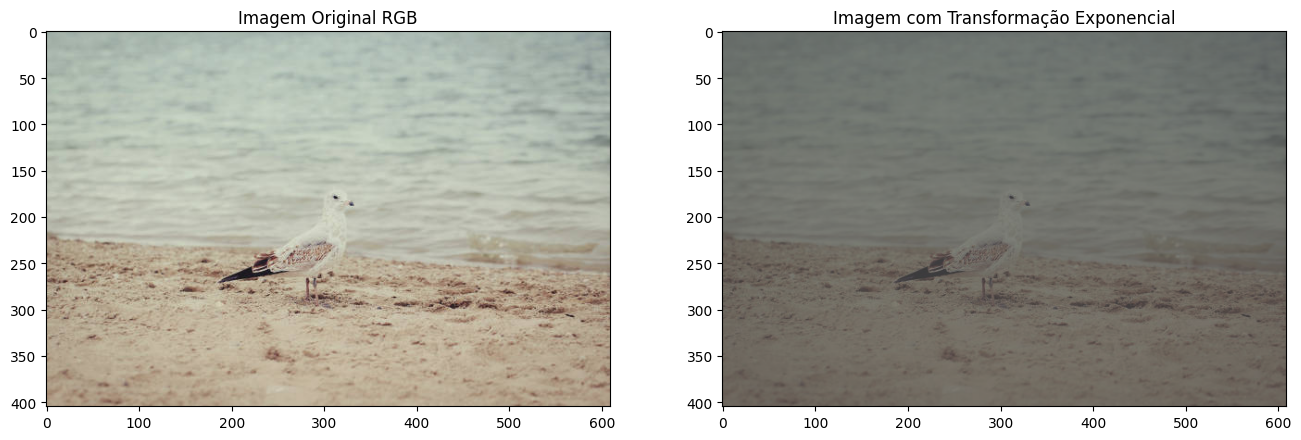

In [13]:
# Normalizando a imagem
imagem_float = imagem_rgb / 255.0
# Crie uma cópia para armazenar a imagem transformada
nova_imagem_rgb = np.zeros_like(imagem_rgb)

# Calculando a transformação Exponencial
for canal in range(3):
    c = 255 / (np.exp(1) - 1)
    f_min = np.min(imagem_rgb[:, :, canal])
    f_max = np.max(imagem_rgb[:, :, canal])
    if f_max - f_min > 0:
        nova_imagem_rgb[:, :, canal] = c * np.exp(imagem_float[:,:,canal]-1)
    else:
        nova_imagem_rgb[:, :, canal] = imagem_rgb[:, :, canal]

nova_imagem_rgb = nova_imagem_rgb.astype(np.uint8)

# Exibindo a imagem original e a transformada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.set_title('Imagem Original RGB')
ax1.imshow(imagem_rgb.astype(np.uint8))
ax2.set_title('Imagem com Transformação Exponencial')
ax2.imshow(nova_imagem_rgb)
plt.show()


## Quadrado

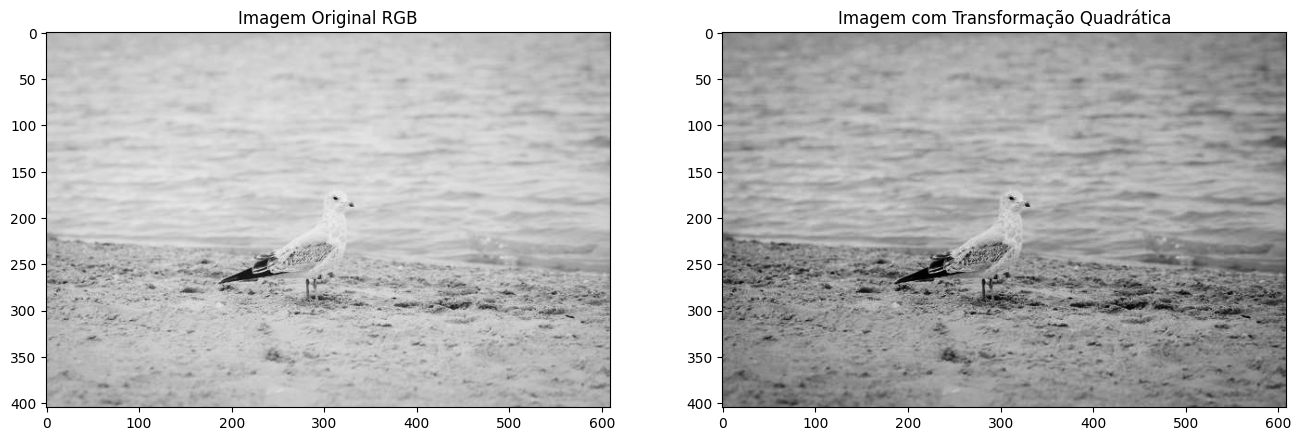

In [14]:
# Normaliza a imagem para o intervalo [0, 1]
imagem_float = imagem_gray / 255.0

# Aplica a transformação quadrática: s = 255 * (r ** 2)
nova_imagem_gray = 255 * (imagem_float ** 2)

# Garante que os valores estejam no intervalo [0, 255] e converte para uint8
nova_imagem_gray = np.clip(nova_imagem_gray, 0, 255).astype(np.uint8)

# Exibindo a imagem original e a transformada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.set_title('Imagem Original RGB')
ax1.imshow(imagem_gray, cmap='gray')
ax2.set_title('Imagem com Transformação Quadrática')
ax2.imshow(nova_imagem_gray,cmap='gray')
plt.show()

- Aplicando para a imagem colorida

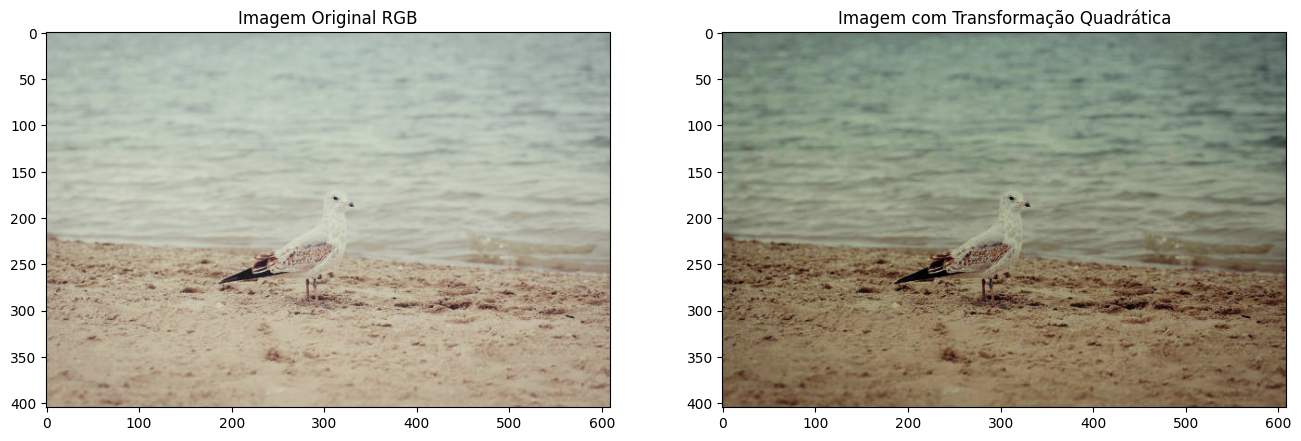

In [18]:
# Normalizando a imagem
imagem_float = imagem_rgb / 255.0
# Crie uma cópia para armazenar a imagem transformada
nova_imagem_rgb = np.zeros_like(imagem_rgb)
c = 255

# Calculando a transformação quadrática
for canal in range(3):
    f_min = np.min(imagem_rgb[:, :, canal])
    f_max = np.max(imagem_rgb[:, :, canal])
    if f_max - f_min > 0:
        nova_imagem_rgb[:, :, canal] = c * (imagem_float[:,:,canal]**2)
    else:
        nova_imagem_rgb[:, :, canal] = imagem_rgb[:, :, canal]/225

nova_imagem_rgb = np.clip(nova_imagem_rgb * 1, 0, 255).astype(np.uint8)

# Exibindo a imagem original e a transformada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.set_title('Imagem Original RGB')
ax1.imshow(imagem_rgb.astype(np.uint8))
ax2.set_title('Imagem com Transformação Quadrática')
ax2.imshow(nova_imagem_rgb)
plt.show()